In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn-deep')


# Import Data and Clean

In [2]:
df_results = pd.read_csv('../data/results.csv')

In [3]:
df_results.head(40)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [4]:
# Mask pit starts, return new table
mask_0 = df_results['grid'] == 0
df_results = df_results[~mask_0]
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23100 entries, 0 to 24679
Data columns (total 18 columns):
resultId           23100 non-null int64
raceId             23100 non-null int64
driverId           23100 non-null int64
constructorId      23100 non-null int64
number             23100 non-null object
grid               23100 non-null int64
position           23100 non-null object
positionText       23100 non-null object
positionOrder      23100 non-null int64
points             23100 non-null float64
laps               23100 non-null int64
time               23100 non-null object
milliseconds       23100 non-null object
fastestLap         23100 non-null object
rank               23100 non-null object
fastestLapTime     23100 non-null object
fastestLapSpeed    23100 non-null object
statusId           23100 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 3.3+ MB


## Separate pole position starts

In [6]:
# Mask for pole position only

mask_1 = df_results['grid'] == 1
df_top_grid = df_results[mask_1]
df_top_grid.head()
# H0: Having the pole position does not increase your probability of winning the race or a podium finish
# Ha: Having the pole position does increase your probability of winning the race or a podium finish

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
40,41,19,13,6,2,1,\N,R,19,0.0,30,\N,\N,15,5,1:35.914,208.048,20
46,47,20,9,2,4,1,3,3,3,6.0,57,+4.998,5471968,55,5,1:33.775,207.765,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1


In [7]:
finish_count = df_top_grid['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
finish_count = finish_count.sort_index(0)

In [8]:
finish_count.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31],
           dtype='int64')

## Plot scatter of pole position start finishes

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ab065c0>)

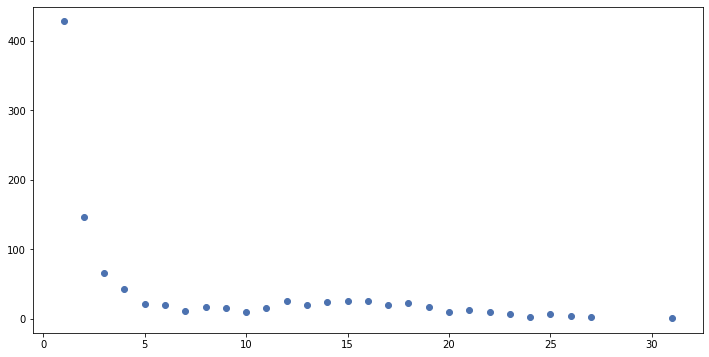

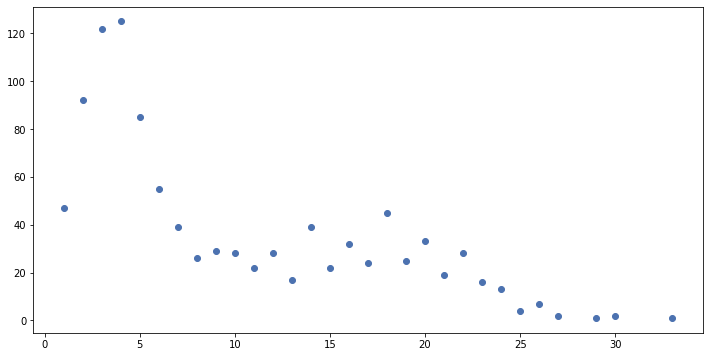

In [9]:
def plot_finishes_by_start(n):
    masker = df_results['grid'] == n
    masked_grid = df_results[masker]
    gridcount = masked_grid['positionOrder'].value_counts()
    gridcount = gridcount.sort_index(0)
    fig, ax = plt.subplots(figsize = (12,6))
    ax.scatter(gridcount.index, gridcount)
    return fig, ax

plot_finishes_by_start(1)
plot_finishes_by_start(5)

# ax.scatter(finish_count.index, finish_count)

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ac95390>)

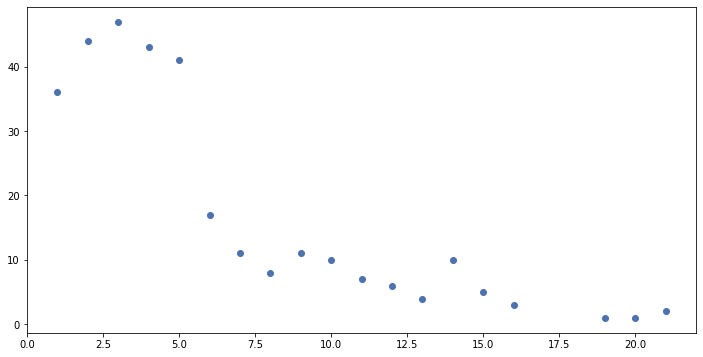

In [10]:
def masker(n, df, col):
    if col == 'rank':
        masker = df[col] == str(n)
    else:
        masker = df[col] == n
    return df[masker]

def maskedcount(n, df, col):
    masked_df = masker(n, df, col)

    count = masked_df['positionOrder'].value_counts()
    count = count.sort_index(0)
    return count
   

def plot_finishes(n, df, col):
    count = maskedcount(n, df ,col)
    fig, ax = plt.subplots(figsize = (12,6))
    ax.scatter(count.index, count)
    return fig, ax

plot_finishes(4, df_results, 'rank')


In [11]:
maskedcount(1, df_results, 'rank')

1     97
2     56
3     35
4     42
5     18
6      9
7     14
9      8
10     2
11     3
12     4
13     1
14     6
15     3
17     2
18     3
19     1
20     4
Name: positionOrder, dtype: int64

In [12]:
np.mean(maskedcount(1, df_results, 'grid'))

36.857142857142854

In [13]:
df_not_top = df_results[~mask_1]
df_not_top

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3
10,11,18,11,8,18,19,\N,R,11,0.0,32,\N,\N,24,15,1:30.892,210.038,7


In [14]:
not_pole_finish_count = df_not_top['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
not_pole_finish_count = not_pole_finish_count.sort_index(0)
not_pole_finish_count

1      596
2      883
3      965
4      988
5     1006
6     1009
7     1017
8     1011
9     1012
10    1012
11    1013
12    1000
13    1000
14     992
15     987
16     971
17     953
18     934
19     921
20     903
21     684
22     650
23     452
24     432
25     288
26     237
27      39
28      26
29      22
30      21
31      17
32      14
33      12
34       1
Name: positionOrder, dtype: int64

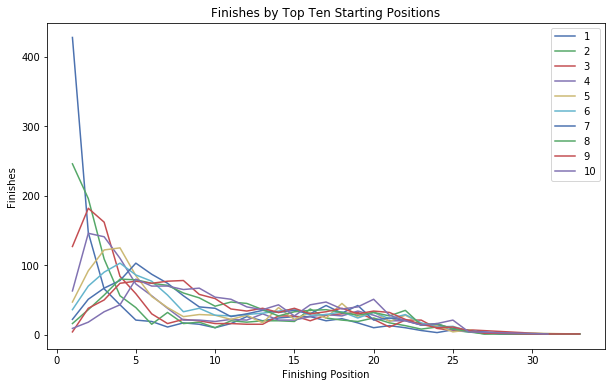

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(maskedcount(1, df_results, 'grid').index, maskedcount(1, df_results, 'grid'), label = '1')
ax.plot(maskedcount(2, df_results, 'grid').index, maskedcount(2, df_results, 'grid'), label = '2')
ax.plot(maskedcount(3, df_results, 'grid').index, maskedcount(3, df_results, 'grid'), label = '3')
ax.plot(maskedcount(4, df_results, 'grid').index, maskedcount(4, df_results, 'grid'), label = '4')
ax.plot(maskedcount(5, df_results, 'grid').index, maskedcount(5, df_results, 'grid'), label = '5')
ax.plot(maskedcount(6, df_results, 'grid').index, maskedcount(6, df_results, 'grid'), label = '6')
ax.plot(maskedcount(7, df_results, 'grid').index, maskedcount(7, df_results, 'grid'), label = '7')
ax.plot(maskedcount(8, df_results, 'grid').index, maskedcount(8, df_results, 'grid'), label = '8')
ax.plot(maskedcount(9, df_results, 'grid').index, maskedcount(9, df_results, 'grid'), label = '9')
ax.plot(maskedcount(10, df_results, 'grid').index, maskedcount(10, df_results, 'grid'), label = '10')
plt.title('Finishes by Top Ten Starting Positions')
plt.xlabel('Finishing Position')
plt.ylabel('Finishes')
ax.legend()
plt.savefig('../images/Finishesbytopten.png');

In [ ]:
fig, ax = plt.subplots()
ax.scatter(not_pole_finish_count.index, not_pole_finish_count)

In [ ]:
def cdf(value, array):
    return (array<value).sum()/len(array)

vcdf = np.vectorize(cdf, excluded = ['array'])



In [ ]:
cdf1 = vcdf(value = finish_count.index, array = finish_count)
cdfnot1 = vcdf(value = not_pole_finish_count.index, array = not_pole_finish_count)
cdf2 = vcdf(value = maskedcount(2, df_results, 'grid').index, array = maskedcount(2, df_results, 'grid'))
cdf3 = vcdf(value = maskedcount(3, df_results, 'grid').index, array = maskedcount(3, df_results, 'grid'))
cdf4 = vcdf(value = maskedcount(4, df_results, 'grid').index, array = maskedcount(4, df_results, 'grid'))
cdf5 = vcdf(value = maskedcount(5, df_results, 'grid').index, array = maskedcount(2, df_results, 'grid'))

# x axis needs to be finish position, instead of finish count

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(finish_count.index, cdf1)
plt.scatter(not_pole_finish_count.index, cdfnot1)
# plt.scatter(grid_2.index, cdf2)
# plt.scatter(grid_3.index, cdf3)

In [ ]:
cdf1

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(finish_count.index, cdf1)
# plt.plot(maskedcount(2, df_results, 'grid').index, cdf2)
# plt.plot(maskedcount(3, df_results, 'grid').index, cdf3)
# plt.scatter(maskedcount(4, df_results, 'grid').index, cdf4)
plt.scatter(maskedcount(5, df_results, 'grid').index, cdf5)

In [ ]:

#starting positon vs fininishing
#drop pit starts

In [ ]:
finish_count[:20], not_pole_finish_count[:20]

In [29]:
# calculate spearman's correlation 
stats.spearmanr(df_results['grid'], df_results['positionOrder'])
#positive correlation, low p-value

SpearmanrResult(correlation=0.44243032763924084, pvalue=0.0)

In [30]:
# calculate spearman's correlation 
stats.spearmanr(df_results['rank'], df_results['positionOrder'])
#positive correlation, low p-value

/Users/Charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.061818957065523365, pvalue=5.245026456533055e-21)

p = 0.0105
Meaning it is statistically significant and the null hypothesis can be rejected.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.jointplot(df_results['positionOrder'], df_results['grid'], kind = 'kde')
plt.set_title('Finish Position by Start Position')
plt.savefig('..data/jointplot.png')

In [ ]:
plt.violinplot(df_top_grid['positionOrder'])


In [ ]:

# plt.scatter(df_results['positionOrder'], df_results['grid'])
# plt.boxplot([df_not_top['positionOrder']], [df_not_top['grid']])
sns.set(style="ticks")


x = df_results['positionOrder']
y = df_results['grid']

ax = sns.jointplot(x, y, kind="kde", color="#4CB391")
plt.suptitle('Finish Position by Start Position')
plt.savefig('../images/jointplot.png')

In [ ]:
sns.set(style="ticks")


x = df_results['positionOrder']
y = df_results['rank']

ax = sns.jointplot(x, y, kind="kde", color="#4CB391")
plt.suptitle('Finish Position by Start Position')
plt.savefig('../images/jointplot2.png')

In [16]:
mask_2 = df_results['grid'] == 2
mask_3 = df_results['grid'] == 3
mask_4 = df_results['grid'] == 4
mask_5 = df_results['grid'] == 5
mask_6 = df_results['grid'] == 6
mask_7 = df_results['grid'] == 7
mask_8 = df_results['grid'] == 8
mask_9 = df_results['grid'] == 9
mask_10 = df_results['grid'] == 10


In [17]:
grid_2 = df_not_top[mask_2]
grid_2 = grid_2['positionOrder'].value_counts().sort_index()
grid_3 = df_not_top[mask_3]
grid_3 = grid_3['positionOrder'].value_counts().sort_index()
grid_4 = df_not_top[mask_4]
grid_4 = grid_4['positionOrder'].value_counts().sort_index()
grid_5 = df_not_top[mask_5]
grid_5 = grid_5['positionOrder'].value_counts().sort_index()
grid_6 = df_not_top[mask_6]
grid_6 = grid_6['positionOrder'].value_counts().sort_index()
grid_7 = df_not_top[mask_7]
grid_7 = grid_7['positionOrder'].value_counts().sort_index()
grid_8 = df_not_top[mask_8]
grid_8 = grid_8['positionOrder'].value_counts().sort_index()
grid_9 = df_not_top[mask_9]
grid_9 = grid_9['positionOrder'].value_counts().sort_index()
grid_10 = df_not_top[mask_10]
grid_10 = grid_10['positionOrder'].value_counts().sort_index()

/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/Charles/anaconda3/lib/python3.7/site-packag

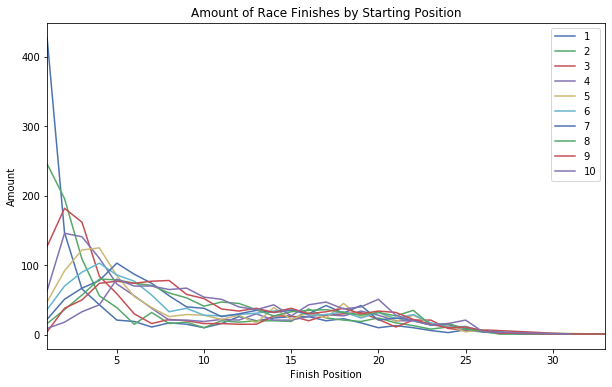

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

finish_count.plot(label= '1')
grid_2.plot(label= '2')
grid_3.plot(label= '3')
grid_4.plot(label= '4')
grid_5.plot(label= '5')
grid_6.plot(label= '6')
grid_7.plot(label= '7')
grid_8.plot(label= '8')
grid_9.plot(label= '9')
grid_10.plot(label= '10');
plt.title('Amount of Race Finishes by Starting Position')
plt.xlabel('Finish Position')
plt.ylabel('Amount')
ax.legend()

#waterfall
#pearson
#spearman ** 
#p-value 
#take out a random sample of race results, do spearman correlation test, return p-value, 
#then take spearman of entire population, take a sample of a small size, bigger size
#investigation of the test
#confidence interval for sample correlation
plt.savefig('../images/finishesbystart.png')


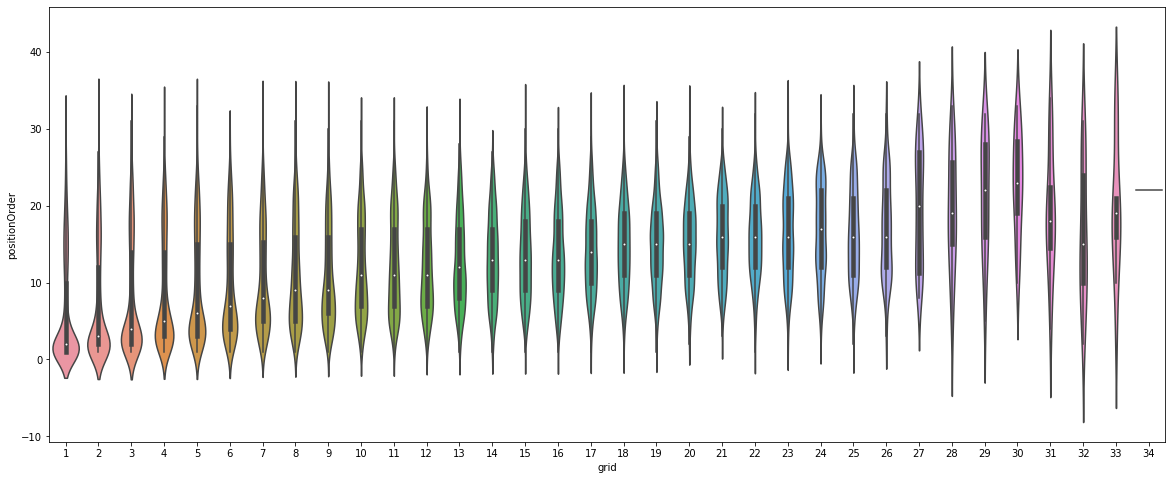

In [48]:
plt.figure(figsize=(20,8))
sns.violinplot(x="grid", y="positionOrder", data=df_results);
plt.savefig('../images/vioplot.png')

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x="grid", y="positionOrder", data=df_results);


# Check correlation for Fastest Lap ('rank')

In [ ]:

df_rank = df_results


In [19]:
# Rank is actually written as a string
maskr_1 = df_results['rank'] == str(1)
df_rank_1 = df_results[maskr_1]
df_rank_1.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
27,28,19,2,2,3,5,6,6,6,3.0,56,+49.833,5528388,55,1,1:35.366,209.244,1
48,49,20,5,1,23,5,5,5,5,4.0,57,+26.789,5493759,49,1,1:33.193,209.062,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
90,91,22,8,6,1,4,3,3,3,6.0,58,+4.271,5213722,20,1,1:26.506,222.144,1


In [20]:
maskr_1 = df_results['rank'] == str(1)
maskr_2 = df_results['rank'] == str(2)
maskr_3 = df_results['rank'] == str(3)
maskr_4 = df_results['rank'] == str(4)
maskr_5 = df_results['rank'] == str(5)
maskr_6 = df_results['rank'] == str(6)
maskr_7 = df_results['rank'] == str(7)
maskr_8 = df_results['rank'] == str(8)
maskr_9 = df_results['rank'] == str(9)
maskr_10 = df_results['rank'] == str(10)


In [21]:
rank_1 = df_results[maskr_1]
rank_1 = rank_1['positionOrder'].value_counts().sort_index()
rank_2 = df_results[maskr_2]
rank_2 = rank_2['positionOrder'].value_counts().sort_index()
rank_3 = df_results[maskr_3]
rank_3 = rank_3['positionOrder'].value_counts().sort_index()
rank_4 = df_results[maskr_4]
rank_4 = rank_4['positionOrder'].value_counts().sort_index()
rank_5 = df_results[maskr_5]
rank_5 = rank_5['positionOrder'].value_counts().sort_index()
rank_6 = df_results[maskr_6]
rank_6 = rank_6['positionOrder'].value_counts().sort_index()
rank_7 = df_results[maskr_7]
rank_7 = rank_7['positionOrder'].value_counts().sort_index()
rank_8 = df_results[maskr_8]
rank_8 = rank_8['positionOrder'].value_counts().sort_index()
rank_9 = df_results[maskr_9]
rank_9 = rank_9['positionOrder'].value_counts().sort_index()
rank_10 = df_results[maskr_10]
rank_10 = rank_10['positionOrder'].value_counts().sort_index()

''

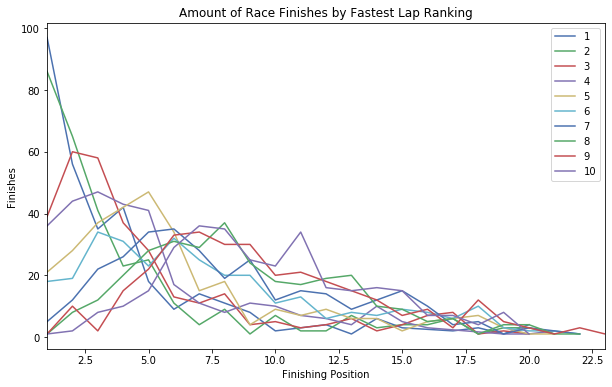

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
rank_1.plot(label= '1')
rank_2.plot(label= '2')
rank_3.plot(label= '3')
rank_4.plot(label= '4')
rank_5.plot(label= '5')
rank_6.plot(label= '6')
rank_7.plot(label= '7')
rank_8.plot(label= '8')
rank_9.plot(label= '9')
rank_10.plot(label= '10');
plt.title('Amount of Race Finishes by Fastest Lap Ranking')
plt.xlabel('Finishing Position')
plt.ylabel('Finishes')
ax.legend()
plt.savefig('../images/fastestlaprankfinish.png')
;

## Spearman test for correlation between fastest time

In [33]:
stats.spearmanr(df_results['rank'], df_results['positionOrder'])
# low correlation but also microscopic p value

SpearmanrResult(correlation=0.061818957065523365, pvalue=5.245026456533055e-21)

## Extra analysis

### Winners only

In [ ]:
wins_only = df_results['positionOrder'] == 1
wins_df = df_results[wins_only]


In [ ]:
wins_df['driverId']


In [ ]:
fig, ax = plt.subplots()
ax.bar(wins_df['driverId'])